In [574]:
import os
import tensorflow as tf

import matplotlib.pyplot as plt
import matplotlib.image as pltimg
%matplotlib inline

training_data_dir = './training_model_data/'
training_good_s = os.path.join(training_data_dir, 'good_soles')
training_bad_s = os.path.join(training_data_dir, 'bad_soles')

print('Training good soles: ', len(os.listdir(training_good_s)))
print('Training bad soles: ', len(os.listdir(training_bad_s)))

testing_data_dir = './test_model_data/'
testing_good_s = os.path.join(testing_data_dir, 'good_soles')
testing_bad_s = os.path.join(testing_data_dir, 'bad_soles')

print('Testing good soles: ', len(os.listdir(testing_good_s)))
print('Testing bad soles: ', len(os.listdir(testing_bad_s)))

Training good soles:  87
Training bad soles:  76
Testing good soles:  25
Testing bad soles:  26


In [575]:
from tensorflow import keras
from keras import layers
from keras import Model

In [576]:
from keras.optimizers import RMSprop

# Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=(150, 150, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Convolution2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Flatten feature map to a 1-dim tensor
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.3)(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(1, activation='sigmoid')(x)

# Configure and compile the model
model = Model(img_input, output)
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['acc'])

In [577]:
model.summary()

Model: "functional_219"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_58 (InputLayer)     │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_174 (Conv2D)             │ (None, 148, 148, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_174               │ (None, 74, 74, 16)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_175 (Conv2D)             │ (None, 72, 72, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_175               │ (None, 36, 36, 32)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_176 (Conv2D)             │ (None, 34, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_176               │ (None, 17, 17, 64)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_109 (Flatten)           │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_218 (Dense)               │ (None, 512)            │     9,470,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_58 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_219 (Dense)               │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,494,561 (36.22 MB)

 Trainable params: 9,494,561 (36.22 MB)

 Non-trainable params: 0 (0.00 B)

In [578]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
    rescale=1./255,    
    rotation_range=40,
    width_shift_range=0.4,
    height_shift_range=0.47,
    shear_range=0.4,
    zoom_range=0.27,
    horizontal_flip=True,)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        training_data_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 163 images belonging to 2 classes.


In [579]:
val_datagen = ImageDataGenerator(rescale=1./255)
# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        testing_data_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 51 images belonging to 2 classes.


In [580]:
history = model.fit(
      train_generator,
      steps_per_epoch=7,  # 159 images = batch_size * steps
      epochs=20,
      validation_data=validation_generator,
      validation_steps=2,  # 63 images = batch_size * steps
      verbose=2)

Epoch 1/20
7/7 - 5s - 779ms/step - acc: 0.5610 - loss: 1.7480 - val_acc: 0.5000 - val_loss: 0.7114
Epoch 2/20


c:\Users\annie\anaconda3\envs\image-classification\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


7/7 - 1s - 95ms/step - acc: 0.5250 - loss: 0.4722 - val_acc: 0.3636 - val_loss: 0.3468
Epoch 3/20


Text(0.5, 1.0, 'Training and validation loss')

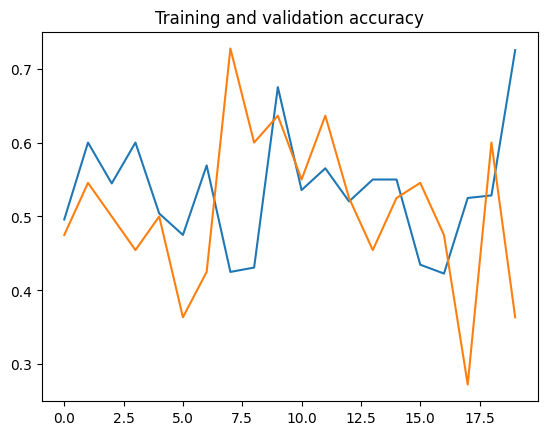

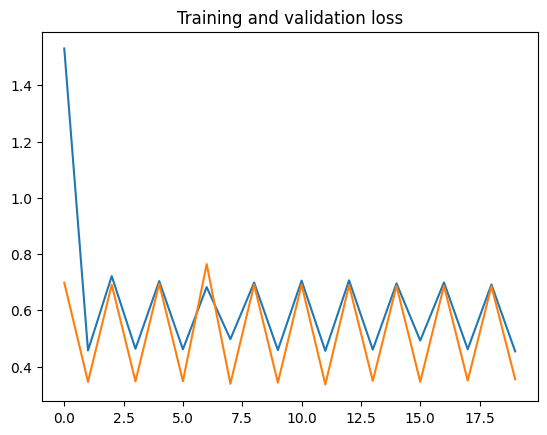

In [ ]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

In [ ]:
def predict(model, img_path):
    img = keras.preprocessing.image.load_img(img_path, target_size=(150, 150))
    img_array = keras.preprocessing.image.img_to_array(img)
    prediction = model.predict(tf.expand_dims(img_array, axis=0))
    score = tf.nn.softmax(prediction[0])

    return score

In [ ]:
predict(model, 'test-prediction-new.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>